In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import itertools
import statsmodels.api as sm
from sklearn.externals import joblib

C:\Users\Nitin Verma\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [25]:
df=pd.read_csv('covid_3.csv')
df.head()

,Days,Count
0,02-02-2020,14
1,03-02-2020,15
2,04-02-2020,14
3,05-02-2020,26
4,06-02-2020,25


In [26]:
df['Days']=pd.to_datetime(df['Days'], format='%d-%m-%Y')

In [27]:
df.head()

,Days,Count
0,2020-02-02,14
1,2020-02-03,15
2,2020-02-04,14
3,2020-02-05,26
4,2020-02-06,25


In [28]:
df.shape

(80, 2)

In [29]:
# Setting Date as the Index
incfrq = df.set_index('Days')
incfrq.index = pd.to_datetime(incfrq.index)
incfrq.index

DatetimeIndex(['2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
      

In [30]:
incfrq.head()

,Count
Days,
2020-02-02,14
2020-02-03,15
2020-02-04,14
2020-02-05,26
2020-02-06,25


In [31]:
# Checking range of dates for our values
print(incfrq.index.min(),'to',incfrq.index.max())

2020-02-02 00:00:00 to 2020-04-21 00:00:00


In [32]:
# Making a new Series with frequency as Day
data1 = incfrq['Count']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
      

In [33]:
data1.head(10)

Days
2020-02-02     14
2020-02-03     15
2020-02-04     14
2020-02-05     26
2020-02-06     25
2020-02-07     55
2020-02-08     83
2020-02-09     64
2020-02-10    103
2020-02-11     37
Freq: D, Name: Count, dtype: int64

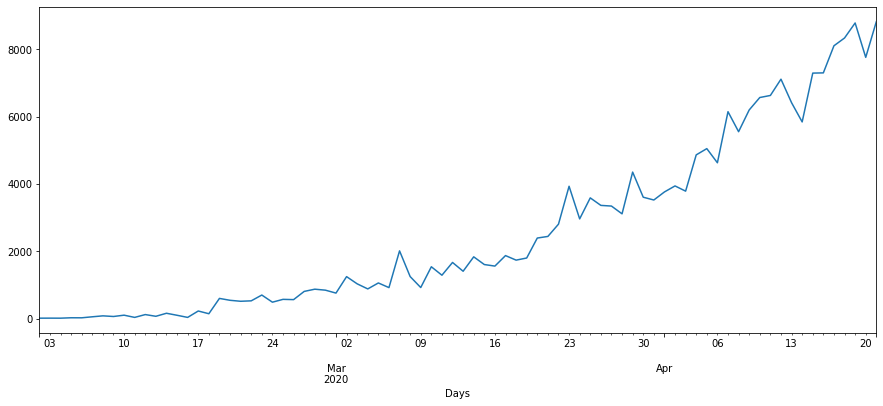

In [34]:
# Plotting number of tickets per day
data1.plot(figsize=(15,6))
plt.show()

In [37]:
# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [39]:
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data1,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:1523.4189929499094
ARIMA(0, 0, 1) - AIC:1455.5899548415612
ARIMA(0, 1, 0) - AIC:1194.380068771501
ARIMA(0, 1, 1) - AIC:1170.4893578575125
ARIMA(1, 0, 0) - AIC:1207.2263686286544
ARIMA(1, 0, 1) - AIC:1164.596957025269
ARIMA(1, 1, 0) - AIC:1181.6194256707572
ARIMA(1, 1, 1) - AIC:1169.4487497269627


C:\Users\Nitin Verma\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [41]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(data1,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3824      0.246     -1.554      0.120      -0.865       0.100
ma.L1         -0.0485      0.241     -0.201      0.840      -0.521       0.424
sigma2      2.194e+05   2.86e+04      7.681      0.000    1.63e+05    2.75e+05


In [51]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2020-04-10'),end=pd.to_datetime('2020-08-28'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2020-04-10    5931.0
2020-04-11    6396.0
2020-04-12    6594.0
2020-04-13    6903.0
2020-04-14    6705.0
               ...  
2020-08-24    8506.0
2020-08-25    8506.0
2020-08-26    8506.0
2020-08-27    8506.0
2020-08-28    8506.0
Freq: D, Length: 141, dtype: float64

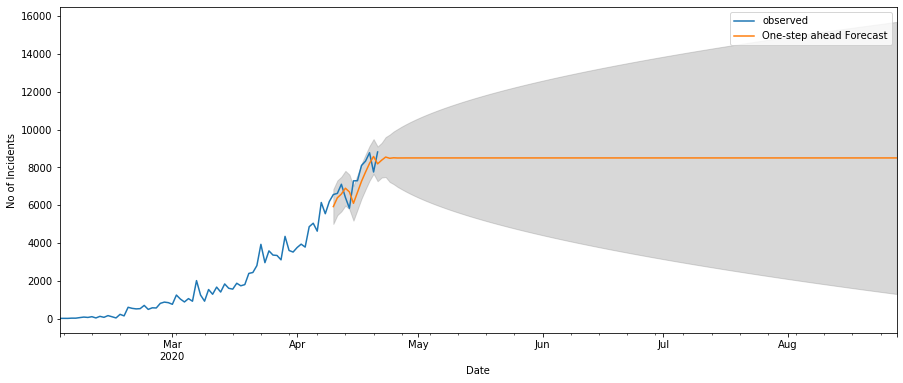

In [52]:
ax = data1['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()